In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load the stock price data
df = pd.read_csv("E:\dataset\stock_amz\STOCK_US_XNAS_AMZN.csv")  # Load the stock data from the CSV file

# Reverse the order of the DataFrame to have the oldest date first
df = df.iloc[::-1]

# Extract the 'Close' price as the target variable
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

In [3]:
# Split the data into training and testing sets
train_data = data_normalized[:int(0.8 * len(data_normalized))]
test_data = data_normalized[int(0.8 * len(data_normalized)):]

In [4]:
# Function to create the LSTM dataset
def create_lstm_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        Y.append(data[i+look_back])
    return np.array(X), np.array(Y)

In [5]:
# Create the LSTM dataset with a look-back of 7 (use previous 7 days' data to predict the next day)
train_X, train_Y = create_lstm_dataset(train_data, look_back=7)
test_X, test_Y = create_lstm_dataset(test_data, look_back=7)


In [6]:
# Reshape the input data to be in the form [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [7]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(train_X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
model.fit(train_X, train_Y, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
7/7 - 1s - loss: 0.1606
Epoch 2/50
7/7 - 0s - loss: 0.0584
Epoch 3/50
7/7 - 0s - loss: 0.0132
Epoch 4/50
7/7 - 0s - loss: 0.0220
Epoch 5/50
7/7 - 0s - loss: 0.0134
Epoch 6/50
7/7 - 0s - loss: 0.0094
Epoch 7/50
7/7 - 0s - loss: 0.0088
Epoch 8/50
7/7 - 0s - loss: 0.0082
Epoch 9/50
7/7 - 0s - loss: 0.0079
Epoch 10/50
7/7 - 0s - loss: 0.0077
Epoch 11/50
7/7 - 0s - loss: 0.0074
Epoch 12/50
7/7 - 0s - loss: 0.0073
Epoch 13/50
7/7 - 0s - loss: 0.0071
Epoch 14/50
7/7 - 0s - loss: 0.0070
Epoch 15/50
7/7 - 0s - loss: 0.0070
Epoch 16/50
7/7 - 0s - loss: 0.0073
Epoch 17/50
7/7 - 0s - loss: 0.0071
Epoch 18/50
7/7 - 0s - loss: 0.0070
Epoch 19/50
7/7 - 0s - loss: 0.0069
Epoch 20/50
7/7 - 0s - loss: 0.0072
Epoch 21/50
7/7 - 0s - loss: 0.0070
Epoch 22/50
7/7 - 0s - loss: 0.0068
Epoch 23/50
7/7 - 0s - loss: 0.0069
Epoch 24/50
7/7 - 0s - loss: 0.0068
Epoch 25/50
7/7 - 0s - loss: 0.0066
Epoch 26/50
7/7 - 0s - loss: 0.0065
Epoch 27/50
7/7 - 0s - loss: 0.0067
Epoch 28/50
7/7 - 0s - loss: 0.0065
E

In [9]:
# Make predictions on the test data
predictions = model.predict(test_X)

In [10]:
# Denormalize the actual prices
actual_prices = scaler.inverse_transform(test_Y.reshape(-1, 1))
# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions)

In [11]:
# Print the predicted prices
for i in range(len(predictions_denormalized)):
    print('Predicted: %.2f' % predictions_denormalized[i])

Predicted: 100.95
Predicted: 101.43
Predicted: 102.46
Predicted: 103.05
Predicted: 102.90
Predicted: 103.08
Predicted: 104.10
Predicted: 104.22
Predicted: 103.68
Predicted: 103.23
Predicted: 102.88
Predicted: 102.82
Predicted: 102.95
Predicted: 102.96
Predicted: 103.37
Predicted: 104.53
Predicted: 105.89
Predicted: 106.77
Predicted: 107.61
Predicted: 108.62
Predicted: 109.87
Predicted: 111.43
Predicted: 112.29
Predicted: 112.66
Predicted: 112.96
Predicted: 113.44
Predicted: 113.40
Predicted: 114.20
Predicted: 115.19
Predicted: 116.01
Predicted: 117.18
Predicted: 118.48
Predicted: 119.71
Predicted: 121.09
Predicted: 120.94
Predicted: 121.18
Predicted: 121.25
Predicted: 121.80
Predicted: 122.28
Predicted: 122.64
Predicted: 123.03
Predicted: 123.30
Predicted: 123.37
Predicted: 123.24


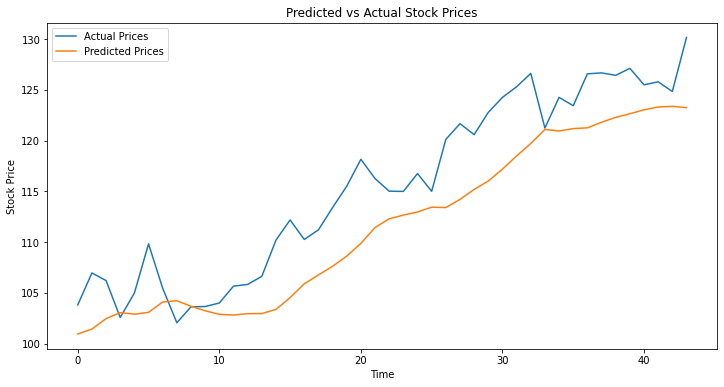

In [12]:
# Plot the predicted prices and actual prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predictions_denormalized, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.legend()
plt.show()